In [27]:
import matplotlib.pyplot as plt # https://matplotlib.org/api/pyplot_summary.html
import numpy as np # https://docs.scipy.org/doc/numpy/reference/
import pandas as pd # https://pandas.pydata.org/pandas-docs/stable/
import scipy.special as spec # https://docs.scipy.org/doc/scipy/reference/special.html
import scipy.stats as st # https://docs.scipy.org/doc/scipy/reference/stats.html
import seaborn as sns # https://seaborn.pydata.org/api.html
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [10]:
print('Load data:')

Load data:


In [6]:
print('Load Retention.txt into Pandas Dataframe')
retention = pd.read_clipboard()
retention.head()

Load Retention.txt into Pandas Dataframe


,spend,apret,top10,rejr,tstsc,pacc,strat,salar
0,9855,52.50,15,29.474,65.063,36.887,12.0,60800
1,10527,64.25,36,22.309,71.063,30.970,12.8,63900
2,7904,37.75,26,25.853,60.750,41.985,20.3,57800
3,6601,57.00,23,11.296,67.188,40.289,17.0,51200
4,7251,62.00,17,22.635,56.250,46.780,18.1,48000


In [6]:
print('Describing Data')
retention.describe(include = 'all')

Describing Data


,spend,apret,top10,rejr,tstsc,pacc,strat,salar
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,10974.511765,56.721076,38.458824,30.654218,66.164165,43.173106,16.086471,61357.647059
std,5500.065580,18.077097,23.406393,17.098104,6.975306,13.105195,4.006503,9802.786457
min,4125.000000,18.750000,8.000000,0.000000,48.125000,8.964000,7.200000,38640.000000
25%,7371.750000,45.374750,22.000000,19.171000,61.111000,33.903750,13.400000,54650.000000
50%,9265.000000,55.708500,30.000000,27.390500,64.781500,40.850500,16.000000,61150.000000
75%,12838.000000,68.687500,49.500000,36.807500,70.453250,51.773250,18.575000,67100.000000
max,35863.000000,95.250000,98.000000,84.067000,87.500000,76.253000,29.200000,87900.000000


In [7]:
print('mode')
retention.mode()

mode


,spend,apret,top10,rejr,tstsc,pacc,strat,salar
0,4125,72.0,24.0,0.0,61.111,36.887,14.8,48000.0
1,4629,NaN,NaN,NaN,NaN,NaN,16.0,57700.0
2,4643,NaN,NaN,NaN,NaN,NaN,NaN,62200.0
3,4695,NaN,NaN,NaN,NaN,NaN,NaN,66200.0
4,4968,NaN,NaN,NaN,NaN,NaN,NaN,67100.0
5,5118,NaN,NaN,NaN,NaN,NaN,NaN,78200.0
6,5333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5492,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print('median')
retention.median()

median


spend     9265.0000
apret       55.7085
top10       30.0000
rejr        27.3905
tstsc       64.7815
pacc        40.8505
strat       16.0000
salar    61150.0000
dtype: float64

In [9]:
print('mean')
retention.mean()

mean


spend    10974.511765
apret       56.721076
top10       38.458824
rejr        30.654218
tstsc       66.164165
pacc        43.173106
strat       16.086471
salar    61357.647059
dtype: float64

In [10]:
print('range')
retention.describe().loc[['min','max']]

range


,spend,apret,top10,rejr,tstsc,pacc,strat,salar
min,4125.0,18.75,8.0,0.000,48.125,8.964,7.2,38640.0
max,35863.0,95.25,98.0,84.067,87.500,76.253,29.2,87900.0


In [11]:
print('variance')
retention.var()

variance


spend    3.025072e+07
apret    3.267814e+02
top10    5.478592e+02
rejr     2.923452e+02
tstsc    4.865490e+01
pacc     1.717461e+02
strat    1.605206e+01
salar    9.609462e+07
dtype: float64

In [12]:
print('standard deviation')
retention.std()

standard deviation


spend    5500.065580
apret      18.077097
top10      23.406393
rejr       17.098104
tstsc       6.975306
pacc       13.105195
strat       4.006503
salar    9802.786457
dtype: float64

In [13]:
print('average absolute deviation (or mean absolute deviation)')
retention.mad()

average absolute deviation (or mean absolute deviation)


spend    4030.450796
apret      14.528539
top10      18.929550
rejr       12.828873
tstsc       5.551878
pacc       10.538930
strat       3.133910
salar    7902.266436
dtype: float64

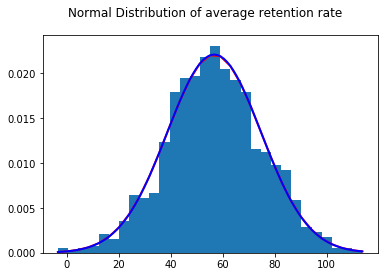

In [25]:
mu = retention['apret'].mean()
sigma = retention['apret'].std()
normal_data = np.random.normal(mu,sigma,1000)
count, bins, ignored = plt.hist(normal_data, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
range_normal = np.linspace(min(bins), max(bins), 100)
plt.plot(range_normal, st.norm.pdf(range_normal, mu, sigma), linewidth=2, color='b')
plt.suptitle('Normal Distribution of average retention rate')
plt.show()

Text(0.5,1,'apret histogram')

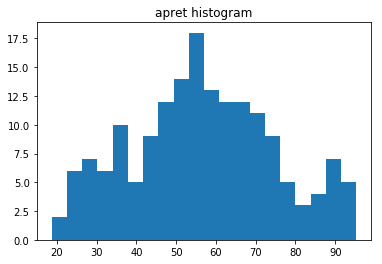

In [22]:
plt.hist(retention['apret'],20)
plt.title('apret histogram')

Text(0.5,1,'tstsc histogram')

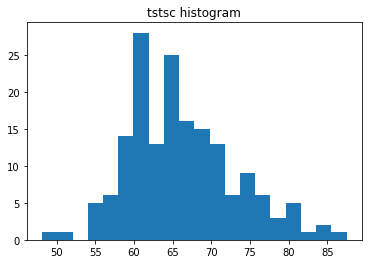

In [21]:
plt.hist(retention['tstsc'],20)
plt.title('tstsc histogram')

Text(0.5,1,'salar histogram')

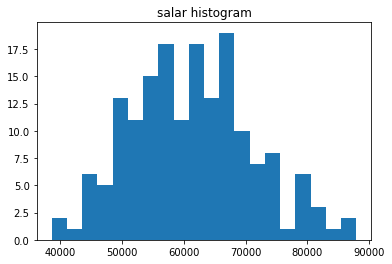

In [23]:
plt.hist(retention['salar'],20)
plt.title('salar histogram')

In [2]:
print('Linear regression')

Linear regression


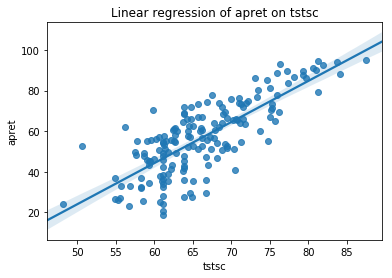

In [6]:
sns.regplot(x = 'tstsc', y = 'apret', data = retention)
_ = plt.title('Linear regression of apret on tstsc')

Text(0.5,1,'Linear regression of apret on salar')

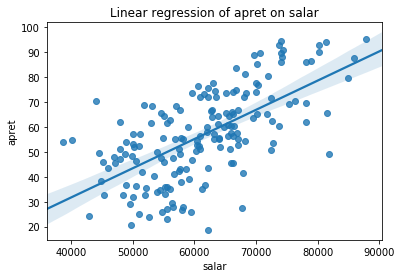

In [7]:
sns.regplot(x = 'salar', y = 'apret', data = retention)
plt.title('Linear regression of apret on salar')

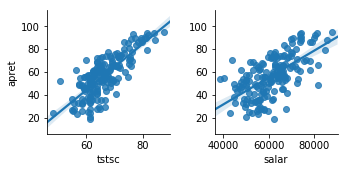

In [8]:
sns.pairplot(retention, x_vars=['tstsc','salar'], y_vars=['apret'],kind="reg" )

In [13]:
x_val = retention[['tstsc','salar']]
y_val = retention['apret']
x_val = sm.add_constant(x_val)
est = sm.OLS(y_val,x_val).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  apret   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           3.60e-36
Time:                        12:20:10   Log-Likelihood:                -649.73
No. Observations:                 170   AIC:                             1305.
Df Residuals:                     167   BIC:                             1315.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.9111      8.210     -9.246      0.000     -92.119     -59.703
tstsc          1.7375      0.176      9.868      0.000       1.390       2.085
salar          0.0003      0.000      2.298      0.023    4.06e-05       0.001
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.589
Skew:                          -0.235   Prob(JB):                        0.452
Kurtosis:                       2.938   Cond. No.                     5.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,0,'tstsc and salar')

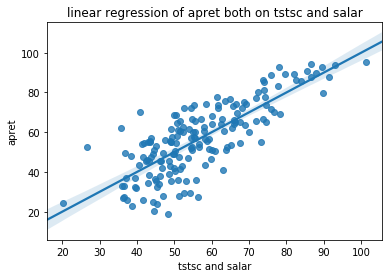

In [20]:
pre = est.predict(x_val)
sns.regplot(pre,y_val)
plt.title('linear regression of apret both on tstsc and salar')
plt.xlabel('tstsc and salar')

In [30]:
def norm(data,name):
    alpha = .05
    p_value = st.shapiro(data)[1]
    if p_value > alpha:
        print(name,"obey normal distribution.")
    else:
        print(name,"fails to obey normal distribution.")
        
norm(retention['spend'], 'spend')
norm(retention['apret'], 'apret')
norm(retention['top10'], 'top10')
norm(retention['rejr'], 'rejr')
norm(retention['tstsc'], 'tstsc')
norm(retention['pacc'], 'pacc')
norm(retention['strat'], 'strat')
norm(retention['salar'], 'salar')

spend fails to obey normal distribution.
apret obey normal distribution.
top10 fails to obey normal distribution.
rejr fails to obey normal distribution.
tstsc fails to obey normal distribution.
pacc fails to obey normal distribution.
strat obey normal distribution.
salar obey normal distribution.


In [28]:
x1=pd.Series(retention['tstsc'])
x2=pd.Series(retention['salar'])
X=pd.concat([x1,x2],axis=1)
df2=pd.DataFrame(X,columns=['tstsc','salar'])

y=retention['apret']
df2['apret']=pd.Series(y)

model=smf.ols(formula='apret ~ tstsc + salar',data=df2)
results_formula=model.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           3.60e-36
Time:                        15:15:32   Log-Likelihood:                -649.73
No. Observations:                 170   AIC:                             1305.
Df Residuals:                     167   BIC:                             1315.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.9111      8.210     -9.246      0.0

(15000, 2)


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


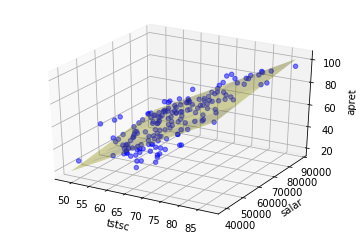

In [29]:
x_surf,y_surf =np.meshgrid(np.linspace(df2.tstsc.min(),df2.tstsc.max(),10),
                           np.linspace(df2.salar.min(),df2.salar.max(),1500))
onlyX= pd.DataFrame({'tstsc': x_surf.ravel(),'salar':y_surf.ravel()})
print(onlyX.shape)
fittedY=results_formula.predict(exog=onlyX)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df2['tstsc'],df2['salar'],df2['apret'],c='blue',marker='o',alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape),color='y',alpha=0.4)
ax.set_xlabel('tstsc')
ax.set_ylabel('salar')
ax.set_zlabel('apret')
plt.show()